# What factors drive a higher conversion rate in Kavak Showrooms?

In [1]:
### Load relevant packages
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
#import plotly.plotly           as py
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os

%matplotlib inline
plt.style.use('ggplot')

## Introduction

**Business Context**. Since a typical Kavak customer’s journey involves a visit to a showroom to see the cars, it is very important to maintain the optimal level and the right mix of inventory in every showroom. Inventory management has a direct impact on conversion rate, user experience and profitability. 
Currently, the inventory management decisions are taken randomly. Quoting the leader of the showrooms: “We currently have no idea of whether there is a potential for improvement in the conversion and where do we start.” With this model, we will be able to add intelligence to this decision and help the showrooms leaders improve conversion rate over time. 

**Business Problem.** Find out what factors influence the sale of a car in a Kavak showroom

**Analytical Context**. We have sales data per car per showroom, we also have online pageviews information per car. We will start with exploratory data analysis for the sales data. 

## Data Exploration

In [94]:
sales_data = pd.read_csv('sales_1.csv',encoding = "ISO-8859-1")

In [95]:
sales_data.head()

,item,LOCATION,LUGAR.DE.VENTA,stock_id,internal_id,marca,YEAR,km,sku,color,...,fecha_entrega,DATE,version,tipo_oferta_aceptada,precio_de_compra,precio_de_publicacion,price_segment,km_segment,model_segment,maker_segment
0,AUTO 16420 ENTREGADO - Hyundai Grand i10 2016 ...,ENTREGADO - 7 DIAS,FLORENCIA,16420,6689035,Hyundai,2004,34572,H19P160210,NARANJA,...,12/12/2019,43798,"4 pts. DHSS, TA, QC, 6 CD, piel, ctl. d/tracc...",Oferta inst?°ntanea,121497.0,142999.0,price segment 1,km segment 1,model segment 1,maker segment 1
1,AUTO 18032 ENTREGADO - Nissan March 2016 - 275...,ENTREGADO - 7 DIAS,FLORENCIA,18032,7874212,Nissan,2009,25445,N32P160109,NEGRO,...,3/11/2020,43025,"2 pts. Trendline, TM5, a/ac., VE, CD, RA",Oferta inst?°ntanea,122576.0,152999.0,price segment 1,km segment 1,model segment 1,maker segment 1
2,AUTO 17849 ENTREGADO - Ford Fiesta 2017 - 2747897,ENTREGADO - 7 DIAS,FLORENCIA,17849,6813707,Ford,2004,10558,F13P170802,AZUL BRILLANTE,...,1/11/2020,43839,"2 pts. Boxter S Cabriolet, TM6",Oferta inst?°ntanea,171876.0,202999.0,price segment 1,km segment 1,model segment 1,maker segment 2
3,AUTO 15863 ENTREGADO - Dodge Neon 2017 - 2657111,ENTREGADO - GARANTIA VIGENTE,FLORENCIA,15863,6620580,Dodge,2009,24000,D10P171203,GRANITO,...,11/13/2019,43781,"4 pts. 325i M Sport, TA, (l??nea anterior)",Oferta consignaci??n,180015.0,197999.0,price segment 1,km segment 1,model segment 1,maker segment 2
4,AUTO 16307 ENTREGADO - Smart Smart 2015 - 2677886,ENTREGADO - GARANTIA VIGENTE,FLORENCIA,16307,6675592,Smart,2008,14658,S47P150103,NEGRO,...,11/25/2019,43794,"4 pts. 515 CDI, TD, TM6, RD, toldo alto, DEE 4...",Oferta 30 dias,141618.0,157999.0,price segment 1,km segment 1,model segment 1,maker segment 2


The available features are:
**Add the column details here.**

In [53]:
sales_data['Month'] =  sales_data['fecha_venta'].apply(lambda x: x[:2])

In [60]:
sales_data.groupby(['LUGAR.DE.VENTA']).count()['stock_id']

LUGAR.DE.VENTA
FLORENCIA         289
FUERA DE KAVAK      9
PLAZA FORTUNA     252
SANTA FE          290
WH - LERMA        289
Name: stock_id, dtype: int64

In [15]:
sales_data.groupby(['Month']).count()['stock_id']

Month
1/    345
11    201
12    261
2/    322
Name: stock_id, dtype: int64

In [16]:
sales_data.groupby(['LUGAR.DE.VENTA','Month']).count()['stock_id']

LUGAR.DE.VENTA  Month
FLORENCIA       1/        70
                11        76
                12        67
                2/        76
FUERA DE KAVAK  1/         5
                2/         4
PLAZA FORTUNA   1/        81
                11        57
                12        52
                2/        62
SANTA FE        1/       107
                11         1
                12        64
                2/       118
WH - LERMA      1/        82
                11        67
                12        78
                2/        62
Name: stock_id, dtype: int64

In [71]:
sales_data.columns

Index(['item', 'LOCATION', 'LUGAR.DE.VENTA', 'stock_id', 'internal_id',
       'marca', 'YEAR', 'km', 'sku', 'color', 'fecha_venta', 'fecha_entrega',
       'DATE', 'version', 'tipo_oferta_aceptada', 'precio_de_compra',
       'precio_de_publicacion', 'price_segment', 'km_segment', 'model_segment',
       'maker_segment'],
      dtype='object')

In [187]:
sales_data.groupby(['km_segment']).describe()['km']

,count,mean,std,min,25%,50%,75%,max
km_segment,,,,,,,,
km segment 1,412.0,23693.847087,8602.760564,1050.0,18721.25,24470.0,31020.25,36300.0
km segment 2,439.0,49860.441913,8294.496058,36649.0,42499.50,49631.0,57100.00,64851.0
km segment 3,278.0,80749.579137,11504.336967,64965.0,72043.00,78587.5,87113.50,110900.0


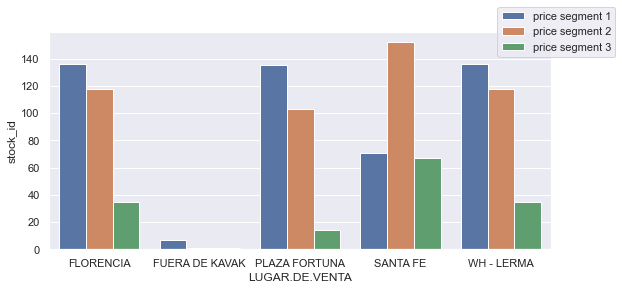

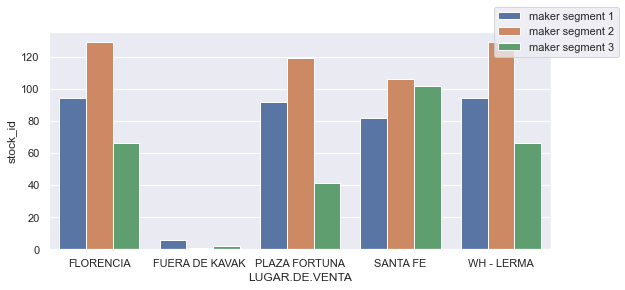

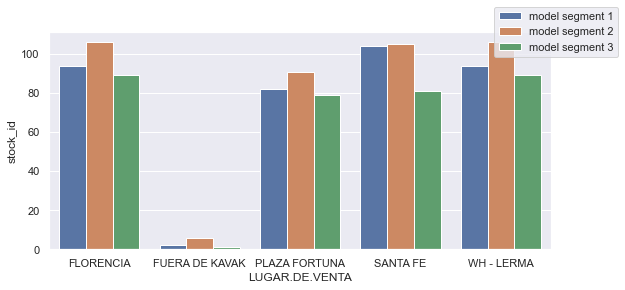

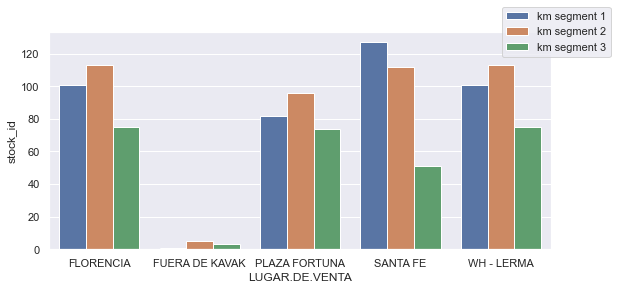

In [173]:
data_folder = 'project/images'
if not os.path.isdir(data_folder):
    os.makedirs(data_folder)

#current_date_time = None
folder_name = 'project/images'#/{0}'#.format(current_date_time)

segment_list = ('price_segment','maker_segment','model_segment','km_segment')

for i in segment_list:
    df2 = sales_data.groupby(['LUGAR.DE.VENTA',i]).count()['stock_id']
    df2 = df2.reset_index(drop=False)

    filename = os.path.join(folder_name, i)

    sns.set(rc={'figure.figsize':(9,4)})
    ax = sns.barplot(x="LUGAR.DE.VENTA", y="stock_id", hue=i, data=df2)
    plt.legend(bbox_to_anchor=(1.01,1), loc=10, borderaxespad=0.)
    plt.savefig(filename)
    plt.show()
    

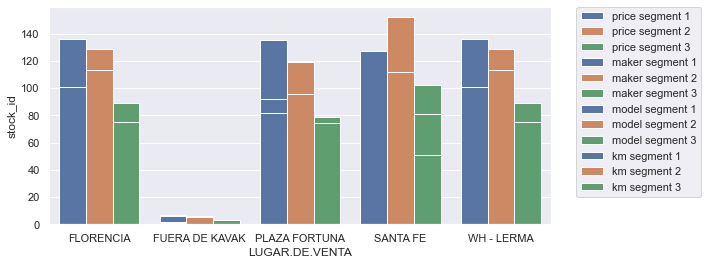

In [143]:
data_folder = 'project/images'
if not os.path.isdir(data_folder):
    os.makedirs(data_folder)

#current_date_time = None
folder_name = 'project/images'#/{0}'#.format(current_date_time)

segment_list = ('price_segment','maker_segment','model_segment','km_segment')

for i in segment_list:
    df2 = sales_data.groupby(['LUGAR.DE.VENTA',i]).count()['stock_id']
    df2 = df2.reset_index(drop=False)

    filename = os.path.join(folder_name, i)

    sns.set(rc={'figure.figsize':(9,4)})
    ax = sns.barplot(x="LUGAR.DE.VENTA", y="stock_id", hue=i, data=df2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(filename)
    plt.show()
    
    
    
    

df2 = sales_data.groupby(['LUGAR.DE.VENTA','price_segment']).count()['stock_id']
df2 = df2.reset_index(drop=False)

filename = os.path.join(folder_name, 'showroom-price.png')

sns.set(rc={'figure.figsize':(9,4)})
ax = sns.barplot(x="LUGAR.DE.VENTA", y="stock_id", hue="price_segment", data=df2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.show()

plt.savefig(filename)

df2 = sales_data.groupby(['LUGAR.DE.VENTA','maker_segment']).count()['stock_id']
df2 = df2.reset_index(drop=False)

filename = os.path.join(folder_name, 'showroom-make.png')

sns.set(rc={'figure.figsize':(9,4)})
ax = sns.barplot(x="LUGAR.DE.VENTA", y="stock_id", hue="maker_segment", data=df2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.show()


plt.savefig(filename)


df2 = sales_data.groupby(['LUGAR.DE.VENTA','model_segment']).count()['stock_id']
df2 = df2.reset_index(drop=False)

filename = os.path.join(folder_name, 'showroom-model.png')

sns.set(rc={'figure.figsize':(9,4)})
ax = sns.barplot(x="LUGAR.DE.VENTA", y="stock_id", hue="model_segment", data=df2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.show()

plt.savefig(filename)

df2 = sales_data.groupby(['LUGAR.DE.VENTA','km_segment']).count()['stock_id']
df2 = df2.reset_index(drop=False)

filename = os.path.join(folder_name, 'showroom-km.png')

sns.set(rc={'figure.figsize':(9,4)})
ax = sns.barplot(x="LUGAR.DE.VENTA", y="stock_id", hue="km_segment", data=df2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.show()

plt.savefig(filename)

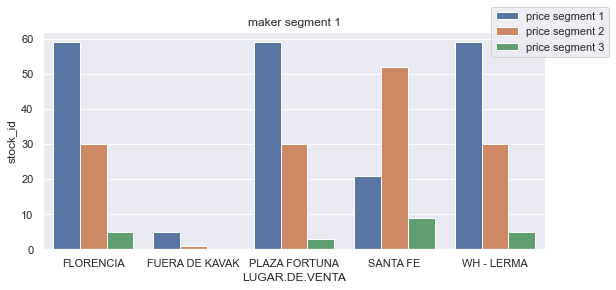

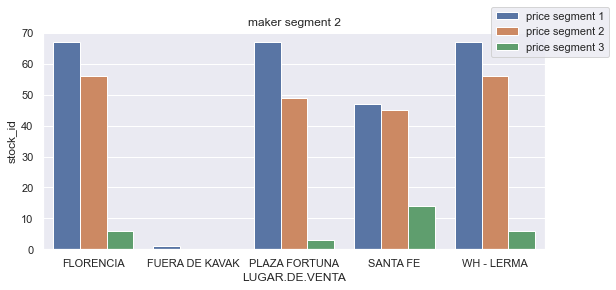

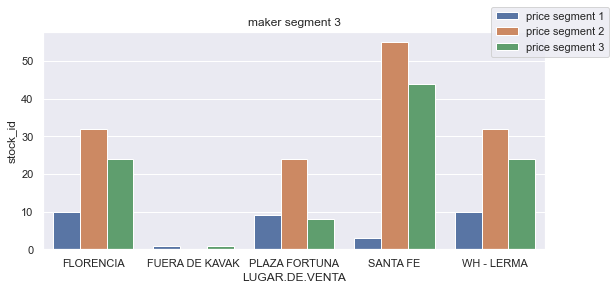

In [181]:
maker_list = sales_data['maker_segment'].unique()
for i in maker_list: 
    filter_df = sales_data.loc[sales_data['maker_segment'] == i]
    df2 = filter_df.groupby(['LUGAR.DE.VENTA','price_segment']).count()['stock_id']
    df2 = df2.reset_index(drop=False)
    
    filename = os.path.join(folder_name, i +'+showroom+price.png')

    sns.set(rc={'figure.figsize':(9,4)})
    ax = sns.barplot(x="LUGAR.DE.VENTA", y="stock_id", hue="price_segment", data=df2)
    plt.legend(bbox_to_anchor=(1.01, 1), loc=10, borderaxespad=0.)
    plt.title(i)
    plt.savefig(filename)
    plt.show()

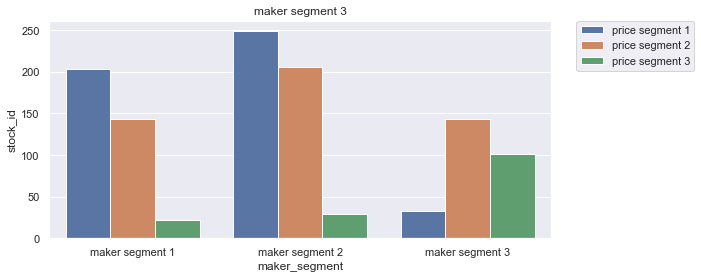

In [132]:
df2 = sales_data.groupby(['maker_segment','price_segment']).count()['stock_id']
df2 = df2.reset_index(drop=False)
sns.set(rc={'figure.figsize':(9,4)})
ax = sns.barplot(x="maker_segment", y="stock_id", hue="price_segment", data=df2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title(i)
plt.show()

In [ ]:
df2 = sales_data.groupby(['LUGAR.DE.VENTA','marca']).count()['stock_id']
df2 = df2.reset_index(drop=False)
sns.set(rc={'figure.figsize':(9,4)})
ax = sns.barplot(x="marca", y="stock_id", hue="LUGAR.DE.VENTA", data=df2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title(i)
plt.show()

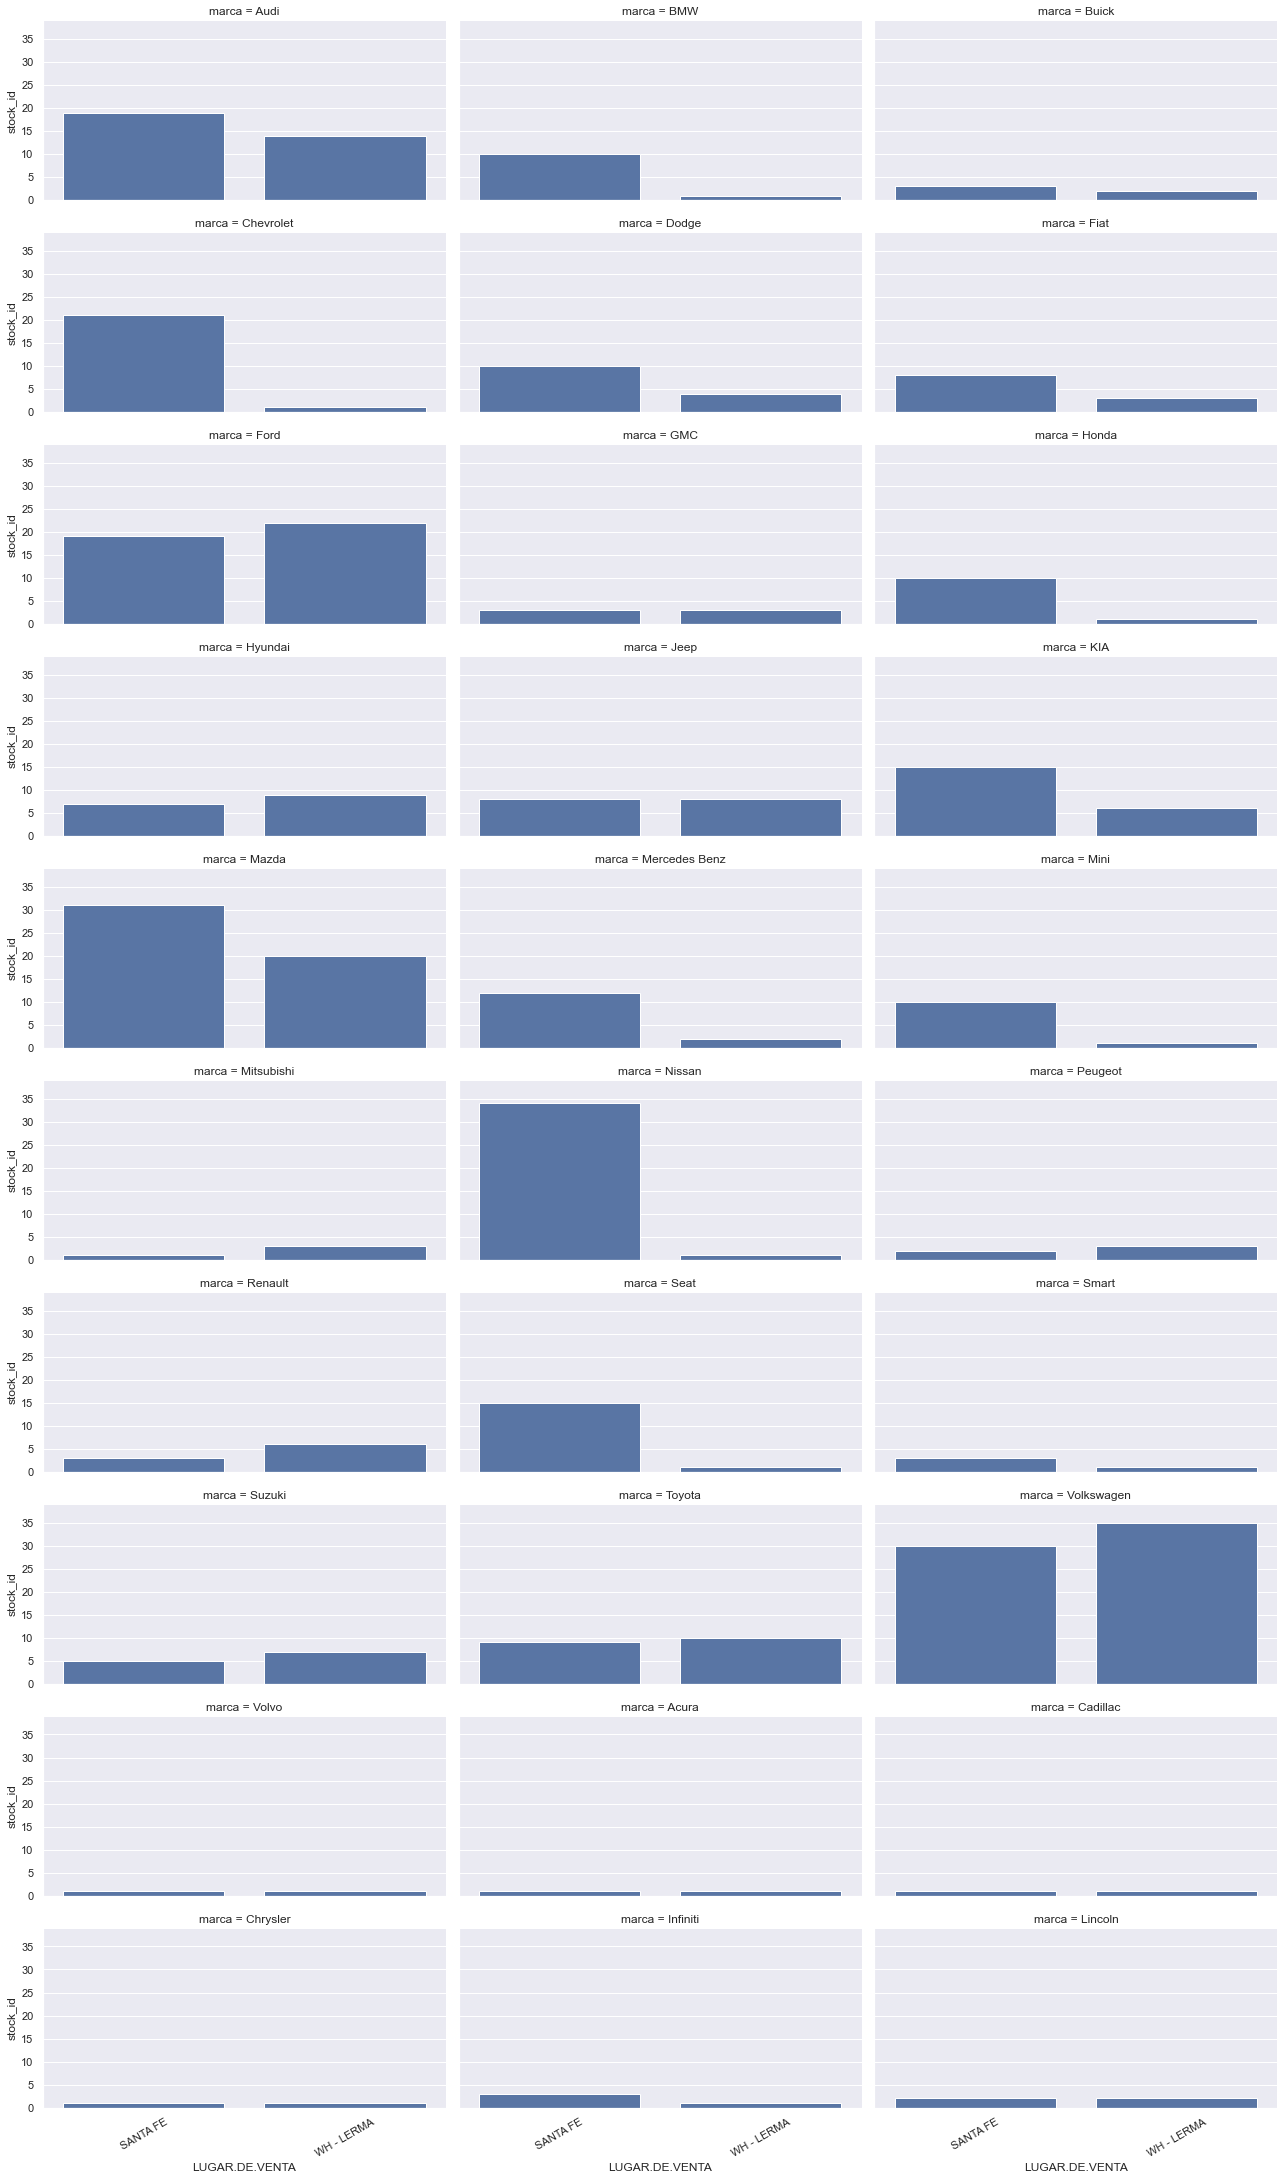

In [186]:
df2 = sales_data.groupby(['LUGAR.DE.VENTA','marca']).count()['stock_id']
df2 = df2.reset_index(drop=False)
sns.set(rc={'figure.figsize':(9,4)})

chart1 = sns.FacetGrid(df2, col='marca', margin_titles=True, col_wrap=3, aspect=2, row_order=df2['marca'].unique)
chart1.map(sns.barplot,'LUGAR.DE.VENTA','stock_id')
chart1.set_xticklabels(rotation=30)


#ax = sns.barplot(x="marca", y="stock_id", hue="LUGAR.DE.VENTA", data=df2)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title(i)
#plt.show()